In [0]:
ls -ltrh

In [0]:
%%bash
sed -n 2,3p D43BF.quality

! Completeness: 94.6%.
! Contamination: 2.7%.


In [0]:
import pandas as pd

/home/cbib/miniconda3/envs/bif/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cbib/miniconda3/envs/bif/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Printing two specific lines and the file name along with them

In [0]:
%%bash
awk 'NR==2 || NR==3 {print $0, FILENAME}' D43BF.quality

! Completeness: 94.6%. D43BF.quality
! Contamination: 2.7%. D43BF.quality


In [0]:
%%bash 
find . -type f -name '*quality' -exec awk 'NR==2 || NR==3 {print $0, FILENAME}' > lorea.test {} +

In [0]:
cat lorea.test

! Completeness: 77.5%. ./NB10.quality
! Contamination: 53.2%. ./NB10.quality


In [0]:
%%bash
find . -type f -name '*quality'

./NB10.quality
./Rosemona_stu.quality
./D43BF.quality
./JCJR2.quality
./JCJR12.quality
./16572_RC21.quality
./16573_RC22.quality
./Rhodesiae_DN15.quality
./Pseudo_GC2.quality
./Pseudo_fragi.quality
./Steno_JC29.quality


In [0]:
%%bash
AWK="awk 'NR==2 || NR==3 {print \$0, FILENAME}'"
parallel "$AWK {}" ::: *.quality > qualities_MiGA.txt
cat qualities_MiGA.txt

! Completeness: 95.5%. 16572_RC21.quality
! Contamination: 0.9%. 16572_RC21.quality
! Completeness: 93.7%. 16573_RC22.quality
! Contamination: 2.7%. 16573_RC22.quality
! Completeness: 94.6%. D43BF.quality
! Contamination: 2.7%. D43BF.quality
! Completeness: 93.7%. JCJR12.quality
! Contamination: 4.5%. JCJR12.quality
! Completeness: 94.6%. JCJR2.quality
! Contamination: 0.9%. JCJR2.quality
! Completeness: 77.5%. NB10.quality
! Contamination: 53.2%. NB10.quality
! Completeness: 91.9%. Pseudo_fragi.quality
! Contamination: 1.8%. Pseudo_fragi.quality
! Completeness: 91.9%. Pseudo_GC2.quality
! Contamination: 73.0%. Pseudo_GC2.quality
! Completeness: 91.9%. Rhodesiae_DN15.quality
! Contamination: 2.7%. Rhodesiae_DN15.quality
! Completeness: 95.5%. Rosemona_stu.quality
! Contamination: 1.8%. Rosemona_stu.quality
! Completeness: 87.4%. Steno_JC29.quality
! Contamination: 66.7%. Steno_JC29.quality


In [0]:
from collections import defaultdict
with open("qualities_MiGA.txt", mode='r', encoding='utf8') as fh:
    quality_dic = defaultdict(list)
    for line in fh:
        line = line.strip("!").strip().split(" ")
        print(line)
        k = line[2].split('.')[0]
        quality_dic[k].append(float(line[1].split('%')[0])) 
d = dict((k, tuple(v)) for k, v in quality_dic.items())
d

['Completeness:', '95.5%.', '16572_RC21.quality']
['Contamination:', '0.9%.', '16572_RC21.quality']
['Completeness:', '93.7%.', '16573_RC22.quality']
['Contamination:', '2.7%.', '16573_RC22.quality']
['Completeness:', '94.6%.', 'D43BF.quality']
['Contamination:', '2.7%.', 'D43BF.quality']
['Completeness:', '93.7%.', 'JCJR12.quality']
['Contamination:', '4.5%.', 'JCJR12.quality']
['Completeness:', '94.6%.', 'JCJR2.quality']
['Contamination:', '0.9%.', 'JCJR2.quality']
['Completeness:', '77.5%.', 'NB10.quality']
['Contamination:', '53.2%.', 'NB10.quality']
['Completeness:', '91.9%.', 'Pseudo_fragi.quality']
['Contamination:', '1.8%.', 'Pseudo_fragi.quality']
['Completeness:', '91.9%.', 'Pseudo_GC2.quality']
['Contamination:', '73.0%.', 'Pseudo_GC2.quality']
['Completeness:', '91.9%.', 'Rhodesiae_DN15.quality']
['Contamination:', '2.7%.', 'Rhodesiae_DN15.quality']
['Completeness:', '95.5%.', 'Rosemona_stu.quality']
['Contamination:', '1.8%.', 'Rosemona_stu.quality']
['Completeness:', '87.

{'16572_RC21': (95.5, 0.9),
 '16573_RC22': (93.7, 2.7),
 'D43BF': (94.6, 2.7),
 'JCJR12': (93.7, 4.5),
 'JCJR2': (94.6, 0.9),
 'NB10': (77.5, 53.2),
 'Pseudo_fragi': (91.9, 1.8),
 'Pseudo_GC2': (91.9, 73.0),
 'Rhodesiae_DN15': (91.9, 2.7),
 'Rosemona_stu': (95.5, 1.8),
 'Steno_JC29': (87.4, 66.7)}

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [0]:
df_qual = pd.DataFrame.from_dict(d)

In [0]:
pd.DataFrame.from_dict?

In [0]:
df_qual.index = ['Completeness','Contamination']
df_qual

,16572_RC21,16573_RC22,D43BF,JCJR12,JCJR2,NB10,Pseudo_fragi,Pseudo_GC2,Rhodesiae_DN15,Rosemona_stu,Steno_JC29
Completeness,95.5,93.7,94.6,93.7,94.6,77.5,91.9,91.9,91.9,95.5,87.4
Contamination,0.9,2.7,2.7,4.5,0.9,53.2,1.8,73.0,2.7,1.8,66.7


In [0]:
matplotlib.style.use('seaborn-colorblind')

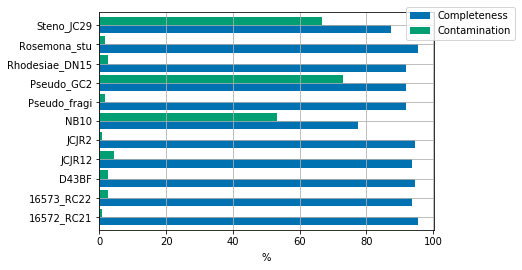

In [0]:
fig, ax = plt.subplots()
df_qual.T.plot(kind='barh', ax=ax, width=0.85, grid=True );
ax.legend(loc=0, bbox_to_anchor=(0.9,0.85));
#plt.tight_layout()
plt.xlabel(r'$\%$')
fig.savefig('complet_cont.png',bbox_inches='tight')